<h1>Download The Dataset</h1>
<p>The dataset is fetched from the url programatically and stored in CSV format.</p>

In [1]:
#download the dataset
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
#read the dataset
import pandas

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pandas.read_csv(csv_path)

In [3]:
fetch_housing_data()

<h1>Exploratory Data Analytics</h1>
<p>Explore the attributes, their datatypes, correlations, and distributions etc.</p>

In [4]:
# fetch the data from a remote location
housing = load_housing_data()

# sample of data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


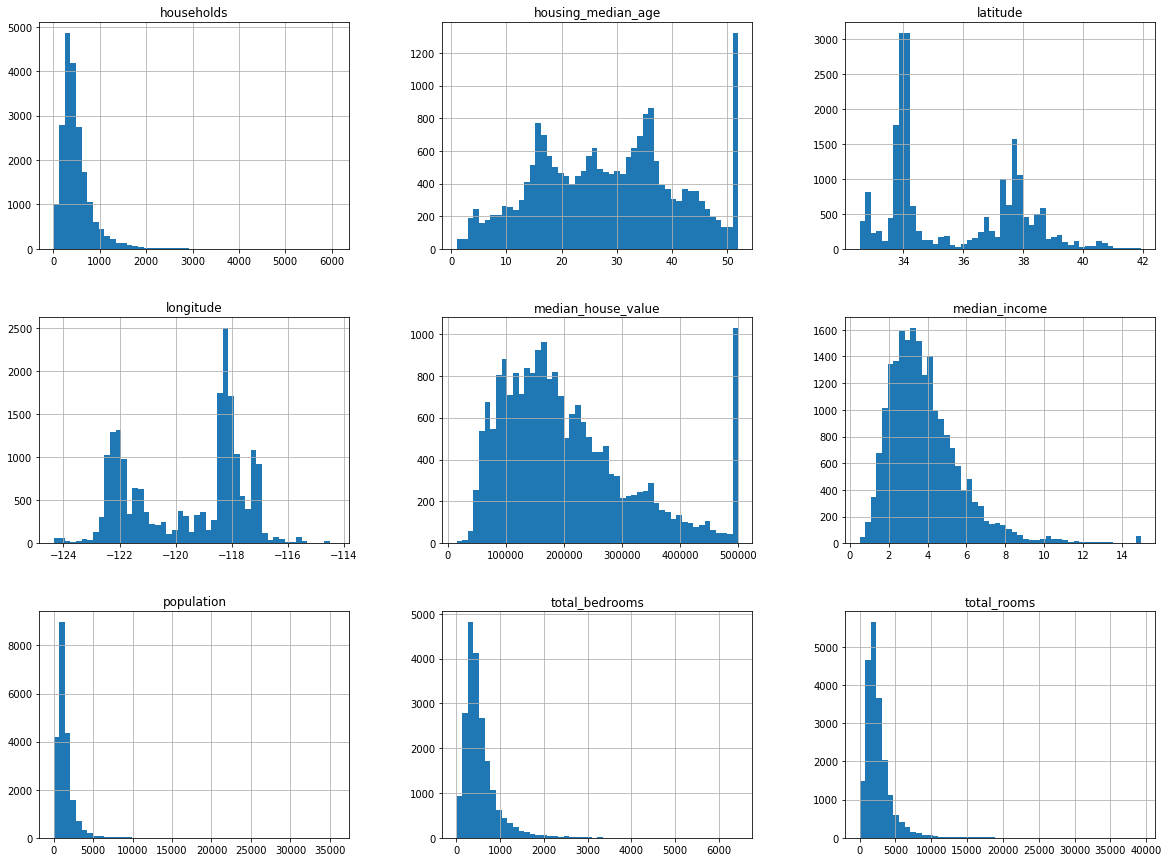

In [8]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
#creating a test set
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

(16512, 'train +', 4128, 'test')


In [11]:
type(housing['ocean_proximity'])

pandas.core.series.Series

Stratified sampling

In [12]:
# creating income category for statified sampling to make the test set represent the entire dataset
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [13]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

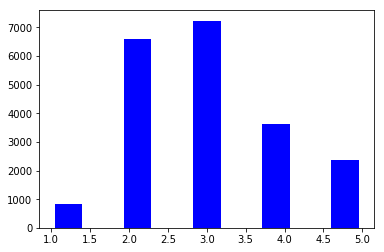

In [14]:
plt.hist(housing["income_cat"], np.linspace(1.0, 5.0, 10), histtype='bar', rwidth=0.8, color="b")
plt.show()

In [15]:
# using scikit learn's stratified sampling library

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_index, test_index = split.split(housing, housing["income_cat"]):
    print('loop ran')
    print(train_index, test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

loop ran
(array([17606, 18632, 14650, ..., 13908, 11159, 15775]), array([ 5241, 10970, 20351, ...,  4019, 12107,  2398]))


In [16]:
housing["income_cat"].value_counts()/ len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
    #print set_
    print type(set_)
    set_.drop("income_cat", axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [84]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

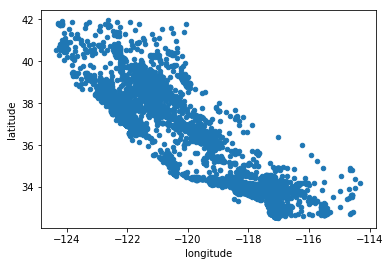

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

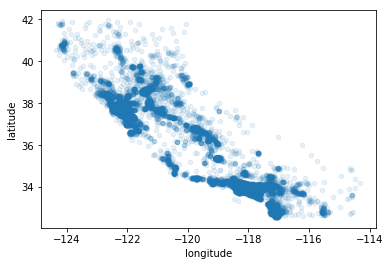

In [20]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

In [21]:
corr_matrix = housing.corr()
print type(corr_matrix)
print corr_matrix["median_house_value"].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


/Users/sashank/Documents/machine-learning/env/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


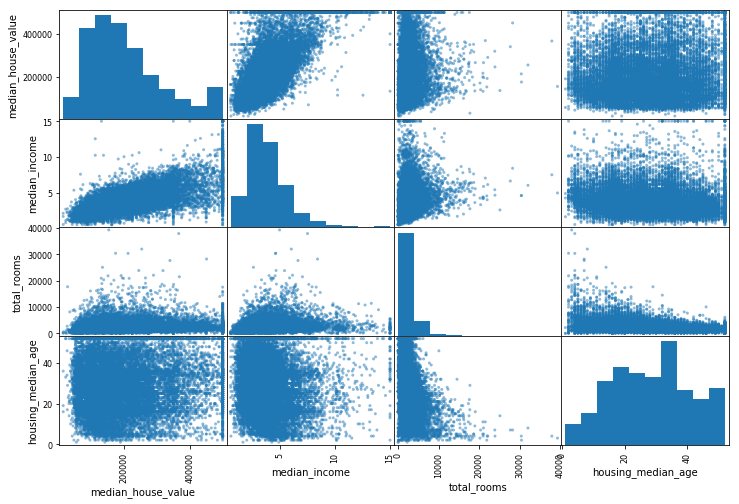

In [22]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<h1>Data Cleaning and Preparation</h1>
<p>To fix missing values in attributes, we have 3 ways to go:</p>
<ol>
    <li>Get rid of the corresponding districts (rows)</li>
    <li>Get rid of the whole attribute</li>
    <li>set the values to some value (usually the median)</li>
</ol>

In [23]:
# Data Cleaning

# fixing total_bedrooms

# option1: Get rid of the corresponding districts (rows)
#housing.dropna(subset=["total_bedrooms"])

#option2: Get rid of the whole attribute
#housing.drop("total_bedrooms", axis=1) # axis : {0 or ‘index’, 1 or ‘columns’}

#option3: set the values to some value (usually the median)
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)

In [24]:
# Using Imputer to fill the missing values with median values

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

# since median can only be computed on numeric values
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

print imputer.statistics_
print housing_num.median().values

[ -1.18510000e+02   3.42600000e+01   2.90000000e+01   2.11950000e+03
   4.33000000e+02   1.16400000e+03   4.08000000e+02   3.54090000e+00
   1.79500000e+05]
[ -1.18510000e+02   3.42600000e+01   2.90000000e+01   2.11950000e+03
   4.33000000e+02   1.16400000e+03   4.08000000e+02   3.54090000e+00
   1.79500000e+05]


In [25]:
X = imputer.transform(housing_num)
#result is into numpy array. Putting it back to pandas dataframe
housing_tr = pandas.DataFrame(X, columns=housing_num.columns)

In [26]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [58]:
# Handling text and categorical attributes using sklearn label encoder

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print housing_cat
print housing_cat_encoded
print encoder.classes_

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
16365        INLAND
19684        INLAND
19234     <1H OCEAN
13956        INLAND
2390         INLAND
11176     <1H OCEAN
15614      NEAR BAY
2953         INLAND
13209        INLAND
6569         INLAND
5825      <1H OCEAN
18086     <1H OCEAN
16718     <1H OCEAN
13600        INLAND
13989        INLAND
15168     <1H OCEAN
6747      <1H OCEAN
7398      <1H OCEAN
5562      <1H OCEAN
16121      NEAR BAY
            ...    
12380        INLAND
5618     NEAR OCEAN
10060        INLAND
18067     <1H OCEAN
4471      <1H OCEAN
19786        INLAND
9969         INLAND
14621    NEAR OCEAN
579        NEAR BAY
11682     <1H OCEAN
245        NEAR BAY
12130        INLAND
16441        INLAND
11016     <1H OCEAN
19934        INLAND
1364       NEAR BAY
1236         INLAND
5364      <1H OCEAN
11703     <1H OCEAN


In [56]:
# 1-hot encoding

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, -1))

ValueError: can only specify one unknown dimension

In [57]:
# We can apply both transformations from text to integer categories to one-hot vectors in a shot suing label binarizer

from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer() # for sparse matrix, sparse_output=True
housing_cat_1hot = encoder.fit_transform(housing_cat)

print housing_cat_1hot
print housing_cat_1hot.shape

[[1 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 1]
 ..., 
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]]
(16512, 5)


Putting all the data preprocessing steps into one single transform

In [33]:
from sklearn.base import BaseEstimator,TransformerMixin
# BaseEstimator to inherit get_params() and set_params() methods
# TransformerMixin for fit_transform() methods
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, household_ix]
        population_per_household = X[:, population_ix]/ X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attr = attr_adder.transform(housing.values)

In [80]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


In [81]:
class CustomBinarizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None,**fit_params):
        return self
    def transform(self, X):
        return LabelBinarizer().fit(X).transform(X)

In [82]:
# Writing Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attr = list(housing_num) # get list of feature names
cat_attr = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attr)),
    ('imputer', Imputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attr)),
    ('encoder', CustomBinarizer()),
])

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])


In [83]:
housing_prepared = cat_pipeline.fit_transform(housing)

In [85]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

/Users/sashank/Documents/machine-learning/env/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)